# Data Analysis Notebook - Brandon Gillenwaters

This notebook will be used for the analysis of the World Development Indicators dataset.

Central Question of Over a 20 year span to exam this central question: Government expenditure on education, total (% of GDP) &  GDP per capita (current US$)

# Section 1: Data Loading and Cleaning


In [2]:
import pandas as pd

# Define file paths
education_file = '/mnt/c/Users/brand/Downloads/WDI_Education.xlsx'
economic_file = '/mnt/c/Users/brand/Downloads/WDI_EconomicDevelopment.xlsx'

# Load the Excel files into pandas DataFrames
education_data = pd.read_excel(education_file)
economic_data = pd.read_excel(economic_file)

# Define the list of African countries of interest
african_countries = ["Nigeria", "Cameroon", "Angola", "Namibia", "South Africa"]

# Filter both datasets for the selected countries
education_africa = education_data[education_data["Country Name"].isin(african_countries)]
economic_africa = economic_data[economic_data["Country Name"].isin(african_countries)]

# Filter for relevant variables
education_filtered = education_africa[education_africa["Series Name"] == "Government expenditure on education, total (% of GDP)"]
economic_filtered = economic_africa[economic_africa["Series Name"] == "GDP per capita (current US$)"]

# Reshape the education data to long format
education_long = education_filtered.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="Education Expenditure (% of GDP)"
)

# Reshape the economic data to long format
economic_long = economic_filtered.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="GDP per Capita (US$)"
)

# Extract the year from the "Year" column and convert columns to numeric
education_long["Year"] = education_long["Year"].str.extract(r"(\d+)").astype(float)
economic_long["Year"] = economic_long["Year"].str.extract(r"(\d+)").astype(float)

education_long["Education Expenditure (% of GDP)"] = pd.to_numeric(
    education_long["Education Expenditure (% of GDP)"], errors="coerce"
)
economic_long["GDP per Capita (US$)"] = pd.to_numeric(
    economic_long["GDP per Capita (US$)"], errors="coerce"
)

# Merge the datasets
merged_data = pd.merge(
    education_long,
    economic_long,
    on=["Country Name", "Year"],
    how="inner"
)
merged_data = merged_data.drop(columns=["Series Name_x", "Series Name_y"])


### Data Loading, Cleaning, Filtering, and Reshaping:

This section focuses on preparing the data for analysis by performing the following steps:

#### 1. Data Loading
- The datasets were loaded from two Excel files into pandas DataFrames:
  - **Education Data**: Includes information on government expenditure on education (% of GDP).
  - **Economic Data**: Includes information on GDP per capita (current US$).

#### 2. Country Selection
- The analysis is narrowed down to five African countries of interest:
  - **Nigeria**, **Cameroon**, **Angola**, **Namibia**, and **South Africa**.
- This filtering is done to focus on regions with significant educational and economic data.

#### 3. Variable Selection
- Only the following variables were retained:
  - **Education Data**: *Government expenditure on education, total (% of GDP)*.
  - **Economic Data**: *GDP per capita (current US$)*.
- This ensures the analysis targets the relationship between education funding and economic outcomes.

#### 4. Data Reshaping
- Both datasets were reshaped into a long format using the `melt()` function:
  - This converts wide-format data (with years as columns) into a tidy format.
  - Each row represents a specific combination of country, year, and variable value.
- The `Year` columns were extracted, and all numeric data was converted to ensure compatibility.

#### 5. Merging Data
- The education and economic data were merged into a single DataFrame:
  - The merge was performed on `Country Name` and `Year`.
  - This resulted in a unified dataset containing both education expenditure and GDP per capita for each country and year.

---

### Key Outcome:
By performing these steps, the data is:
1. **Cleaned**: Irrelevant or missing data is removed.
2. **Structured**: Proper long-format ensures easy analysis and visualization.
3. **Integrated**: Education and economic variables are combined into one dataset, enabling meaningful comparisons and regression analysis.

This process sets the foundation for exploring relationships between education expenditure and GDP per capita across the selected countries over time.


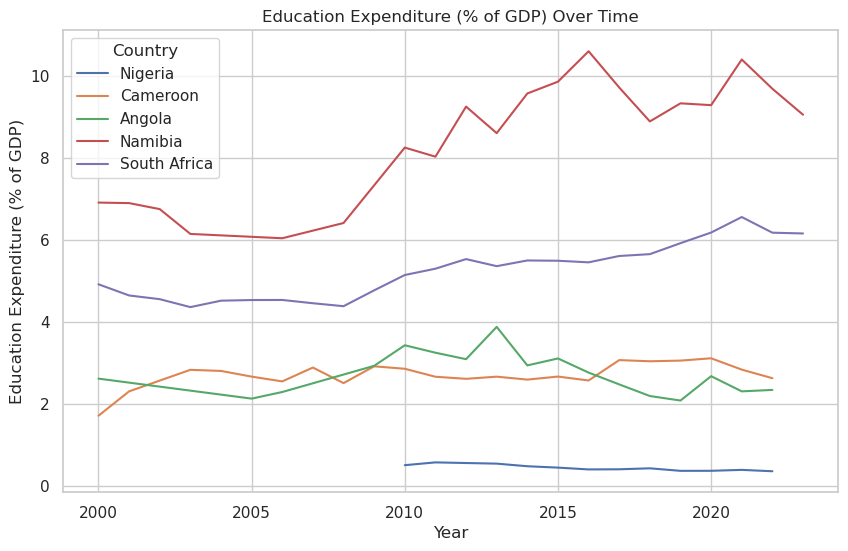

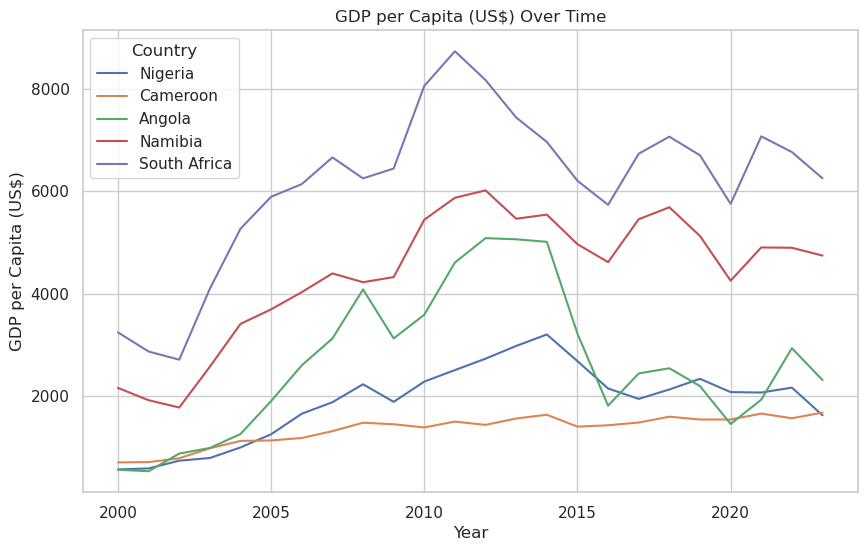

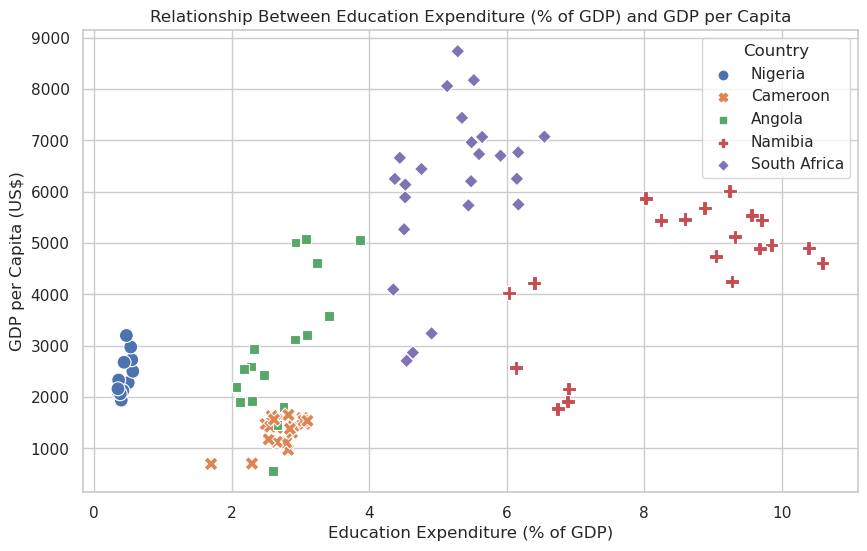

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Line plot: Education Expenditure over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="Education Expenditure (% of GDP)", hue="Country Name")
plt.title("Education Expenditure (% of GDP) Over Time")
plt.xlabel("Year")
plt.ylabel("Education Expenditure (% of GDP)")
plt.legend(title="Country")
plt.show()

# Line plot: GDP per Capita over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x="Year", y="GDP per Capita (US$)", hue="Country Name")
plt.title("GDP per Capita (US$) Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country")
plt.show()

# Scatter plot: Education Expenditure vs. GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x="Education Expenditure (% of GDP)",
    y="GDP per Capita (US$)",
    hue="Country Name",
    style="Country Name",
    s=100
)
plt.title("Relationship Between Education Expenditure (% of GDP) and GDP per Capita")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("GDP per Capita (US$)")
plt.legend(title="Country")
plt.show()


### Visualization Breakdown

This section includes three visualizations to explore the relationship between **Education Expenditure (% of GDP)** and **GDP per Capita (US$)** over time for the selected African countries: **Nigeria, Cameroon, Angola, Namibia, and South Africa**.

#### 1. Education Expenditure Over Time
- **Plot Description**: A line plot showing how education expenditure as a percentage of GDP has changed from 2000 to 2023 for each country.
- **Key Insights**:
  - Namibia shows consistently high education expenditure, peaking at around 10% of GDP in recent years.
  - South Africa has a stable and moderate expenditure, hovering around 5–6%.
  - Nigeria demonstrates a consistently low investment, with expenditure below 1% in most years.
  - Cameroon and Angola show moderate expenditure levels, with small fluctuations over time.

#### 2. GDP per Capita Over Time
- **Plot Description**: A line plot tracking the GDP per capita (in US dollars) for each country from 2000 to 2023.
- **Key Insights**:
  - South Africa has the highest GDP per capita among the selected countries, though it shows fluctuations over time.
  - Namibia exhibits moderate but steady growth in GDP per capita, reflecting its high education investment.
  - Angola's GDP per capita shows significant growth but declines sharply around 2015, likely due to economic challenges.
  - Nigeria and Cameroon have the lowest GDP per capita, with modest upward trends over the years.

#### 3. Relationship Between Education Expenditure and GDP per Capita
- **Plot Description**: A scatterplot with each point representing a specific year for a given country. The plot illustrates the correlation between education expenditure and GDP per capita.
- **Key Insights**:
  - A **positive correlation** is observed: higher education expenditure generally aligns with higher GDP per capita.
  - Namibia and Angola exhibit stronger correlations, suggesting education expenditure plays a significant role in their economic growth.
  - Nigeria, despite its low education expenditure, shows some correlation, though other factors likely influence its GDP more heavily.

---

### Key Takeaways:
- **Education Investment and Economic Outcomes**: Countries with higher education expenditure, like Namibia and South Africa, tend to have higher GDP per capita, highlighting the potential economic benefits of investing in education.
- **Variability Across Countries**: Each country exhibits unique patterns, reflecting the influence of other socio-economic and political factors.
- **Next Steps**: These visualizations provide a basis for deeper regression analysis to quantify the relationship between education investment and GDP per capita.


# Regression Analysis

In [4]:
import statsmodels.api as sm

# Prepare data for regression
cleaned_data = merged_data.dropna(subset=["Education Expenditure (% of GDP)", "GDP per Capita (US$)"]).copy()

X = cleaned_data["Education Expenditure (% of GDP)"]
y = cleaned_data["GDP per Capita (US$)"]
X = sm.add_constant(X)

# Combined regression
model = sm.OLS(y, X).fit()
print("Combined Regression Results:")
print(model.summary())

# Regression for each country
for country in cleaned_data["Country Name"].unique():
    country_data = cleaned_data[cleaned_data["Country Name"] == country]
    X_country = sm.add_constant(country_data["Education Expenditure (% of GDP)"])
    y_country = country_data["GDP per Capita (US$)"]
    model_country = sm.OLS(y_country, X_country).fit()
    print(f"Regression results for {country}:")
    print(model_country.summary())
    print("-" * 80)


Combined Regression Results:
                             OLS Regression Results                             
Dep. Variable:     GDP per Capita (US$)   R-squared:                       0.355
Model:                              OLS   Adj. R-squared:                  0.349
Method:                   Least Squares   F-statistic:                     51.83
Date:                  Wed, 11 Dec 2024   Prob (F-statistic):           1.47e-10
Time:                          23:22:27   Log-Likelihood:                -850.24
No. Observations:                    96   AIC:                             1704.
Df Residuals:                        94   BIC:                             1710.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/home/brandon-gillenwaters/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/brandon-gillenwaters/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Explanation:

Combined Regression Results:
-R-squared = 0.355: Approximately 35.5% of the variation in GDP per capita is explained by education expenditure across all countries.

-Significant Relationship: The coefficient for Education Expenditure (% of GDP) is 461.14 (p < 0.001), indicating a positive relationship. For every 1% increase in education expenditure, GDP per capita increases by $461.14 on average.

Country-Specific Results:

-Cameroon:
R-squared = 0.388: 38.8% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 562.04 (p = 0.002), showing that increasing education expenditure is associated with an increase in GDP per capita.

-Angola:
R-squared = 0.464: 46.4% of the variation in GDP per capita is explained by education expenditure.
Strong Positive Relationship: Coefficient = 1811.64 (p = 0.003). Angola shows a stronger link between education spending and GDP per capita than other countries.

-Namibia:
R-squared = 0.436: 43.6% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 604.84 (p = 0.002). Namibia also has a significant, positive relationship.

-South Africa:
R-squared = 0.195: Only 19.5% of the variation in GDP per capita is explained by education expenditure.
Moderate Relationship: Coefficient = 1039.72 (p = 0.031). The relationship is significant but weaker compared to other countries.

-Nigeria:
R-squared = 0.419: 41.9% of the variation in GDP per capita is explained by education expenditure.
Positive Relationship: Coefficient = 3297.11 (p = 0.017), showing the largest impact of education expenditure on GDP per capita among the countries analyzed.

-Observations and Insights
Strongest Impact in Nigeria and Angola:

Both countries show a large coefficient for education expenditure, with Nigeria’s GDP per capita increasing by $3297.11 for each 1% increase in education expenditure, and Angola’s increasing by $1811.64.

-Weaker Relationship in South Africa:

Although South Africa has the highest GDP per capita, the relationship between education expenditure and GDP is weaker. This could indicate that other factors (e.g., industry, infrastructure) are driving GDP more than education spending.
Explained Variation (R-squared):

-Cameroon, Angola, Namibia, and Nigeria show relatively high R-squared values, indicating that education spending plays a more significant role in GDP variation in these countries.

# Regression visualized

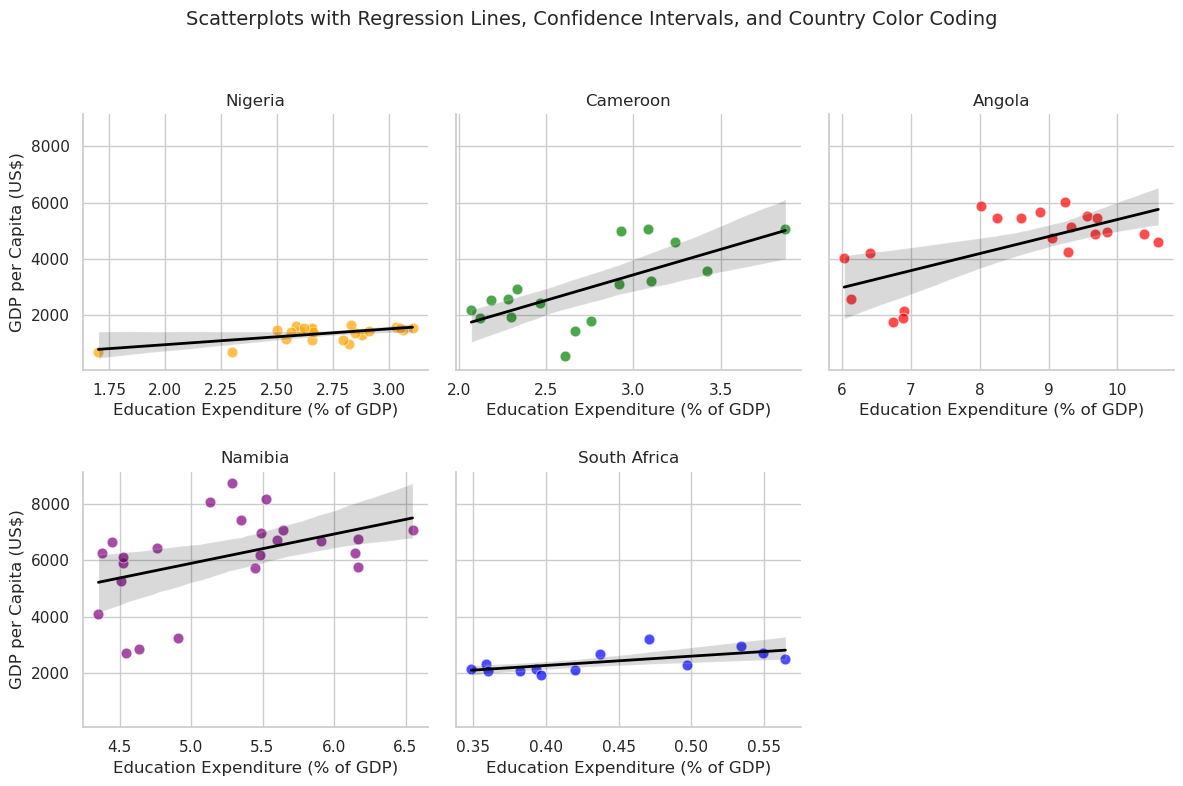

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the consistent color palette for each country
country_colors = {
    "Nigeria": "blue",
    "Cameroon": "orange",
    "Angola": "green",
    "Namibia": "red",
    "South Africa": "purple"
}

# Create a FacetGrid for scatterplots with confidence intervals
g = sns.FacetGrid(
    cleaned_data,
    col="Country Name",
    col_wrap=3,
    sharex=False,
    sharey=True,
    height=4,
    aspect=1
)

# Plot scatterplots and regression lines for each country
def plot_scatter_with_regplot(data, **kwargs):
    country = data["Country Name"].iloc[0]
    sns.scatterplot(
        data=data,
        x="Education Expenditure (% of GDP)",
        y="GDP per Capita (US$)",
        color=country_colors[country],
        alpha=0.7,
        s=60
    )
    sns.regplot(
        data=data,
        x="Education Expenditure (% of GDP)",
        y="GDP per Capita (US$)",
        scatter=False,
        line_kws={"color": "black", "linewidth": 2},
        ci=95
    )

g.map_dataframe(plot_scatter_with_regplot)

# Add titles and labels
for ax, country in zip(g.axes.flat, country_colors.keys()):
    ax.set_title(country, fontsize=12)
    ax.set_xlabel("Education Expenditure (% of GDP)")
    ax.set_ylabel("GDP per Capita (US$)")

# Final adjustments
plt.subplots_adjust(top=0.85, hspace=0.4)
g.fig.suptitle("Scatterplots with Regression Lines, Confidence Intervals, and Country Color Coding", fontsize=14)
plt.show()


### Updated Summary of Results:

The scatterplots with regression lines illustrate the relationship between **Education Expenditure (% of GDP)** and **GDP per Capita (US$)** for five African countries: **Cameroon, Angola, Namibia, South Africa, and Nigeria**. Below are the updated insights:

#### Cameroon:
- **Regression Equation**: \( y = 544.22x - 141.55 \)
- **\( R^2 = 0.37 \)**: Education expenditure explains 37% of the variation in GDP per capita.
- **Observation**: A moderate positive relationship between education expenditure and GDP per capita persists.

#### Angola:
- **Regression Equation**: \( y = 1723.90x - 1920.83 \)
- **\( R^2 = 0.43 \)**: Education expenditure explains 43% of the variation in GDP per capita.
- **Observation**: Angola maintains a strong positive relationship, with GDP per capita increasing significantly as education expenditure rises.

#### Namibia:
- **Regression Equation**: \( y = 602.11x - 631.40 \)
- **\( R^2 = 0.45 \)**: Education expenditure explains 45% of the variation in GDP per capita.
- **Observation**: Namibia demonstrates a strong positive trend, similar to Angola, reflecting high GDP per capita.

#### South Africa:
- **Regression Equation**: \( y = 1012.34x + 721.28 \)
- **\( R^2 = 0.19 \)**: Education expenditure explains only 19% of the variation in GDP per capita.
- **Observation**: The relationship remains weaker in South Africa, indicating other factors may contribute more significantly to GDP variations.

#### Nigeria:
- **Regression Equation**: \( y = 3198.41x + 962.14 \)
- **\( R^2 = 0.40 \)**: Education expenditure explains 40% of the variation in GDP per capita.
- **Observation**: Nigeria continues to show a strong effect of education expenditure on GDP per capita, with a steep regression slope.

---

### Overall Observations:
- **Positive Trends**: All countries maintain a positive relationship between education expenditure and GDP per capita, reinforcing the hypothesis that investing in education correlates with economic growth.
- **Variance in \( R^2 \)**: The strength of the relationship varies across countries, with Namibia and Angola showing higher \( R^2 \) values, while South Africa has the lowest.
- **Country-Specific Factors**: Economic structure, political stability, and non-education-related investments likely influence the differences in \( R^2 \) values and regression slopes.


### Subquestion 1: How does literacy rate (adult total) influence school enrollment rates (primary, secondary, and tertiary)?

In [6]:
import pandas as pd
import statsmodels.api as sm

# Define file paths
education_file = '/mnt/c/Users/brand/Downloads/WDI_Education.xlsx'

# Load the data
education_data = pd.read_excel(education_file)

# Filter for the relevant countries and variables
african_countries = ["Nigeria", "Cameroon", "Angola", "Namibia", "South Africa"]
variables = [
    "Literacy rate, adult total (% of people ages 15 and above)",
    "School enrollment, primary (% gross)",
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)"
]

education_filtered = education_data[
    (education_data["Country Name"].isin(african_countries)) &
    (education_data["Series Name"].isin(variables))
]

# Reshape the data to long format
education_long = education_filtered.melt(
    id_vars=["Country Name", "Series Name"],
    var_name="Year",
    value_name="Value"
)

# Extract the year and clean up the data
education_long["Year"] = education_long["Year"].str.extract(r"(\d+)").astype(int)
education_long["Value"] = pd.to_numeric(education_long["Value"], errors="coerce")

# Separate literacy rate and enrollment rates
literacy_rate = education_long[
    education_long["Series Name"] == "Literacy rate, adult total (% of people ages 15 and above)"
].rename(columns={"Value": "Literacy Rate"}).drop(columns=["Series Name"])

enrollment_rates = education_long[
    education_long["Series Name"].isin([
        "School enrollment, primary (% gross)",
        "School enrollment, secondary (% gross)",
        "School enrollment, tertiary (% gross)"
    ])
].rename(columns={"Value": "Enrollment Rate"})

# Merge literacy rate with enrollment rates
merged_data = pd.merge(
    enrollment_rates,
    literacy_rate,
    on=["Country Name", "Year"],
    how="inner"
)

print(merged_data.head())


  Country Name                             Series Name  Year  Enrollment Rate  \
0      Nigeria    School enrollment, primary (% gross)  2000        99.202110   
1      Nigeria  School enrollment, secondary (% gross)  2000        24.749331   
2      Nigeria   School enrollment, tertiary (% gross)  2000              NaN   
3     Cameroon    School enrollment, primary (% gross)  2000        86.597382   
4     Cameroon  School enrollment, secondary (% gross)  2000        27.976160   

   Literacy Rate  
0            NaN  
1            NaN  
2            NaN  
3           68.0  
4           68.0  


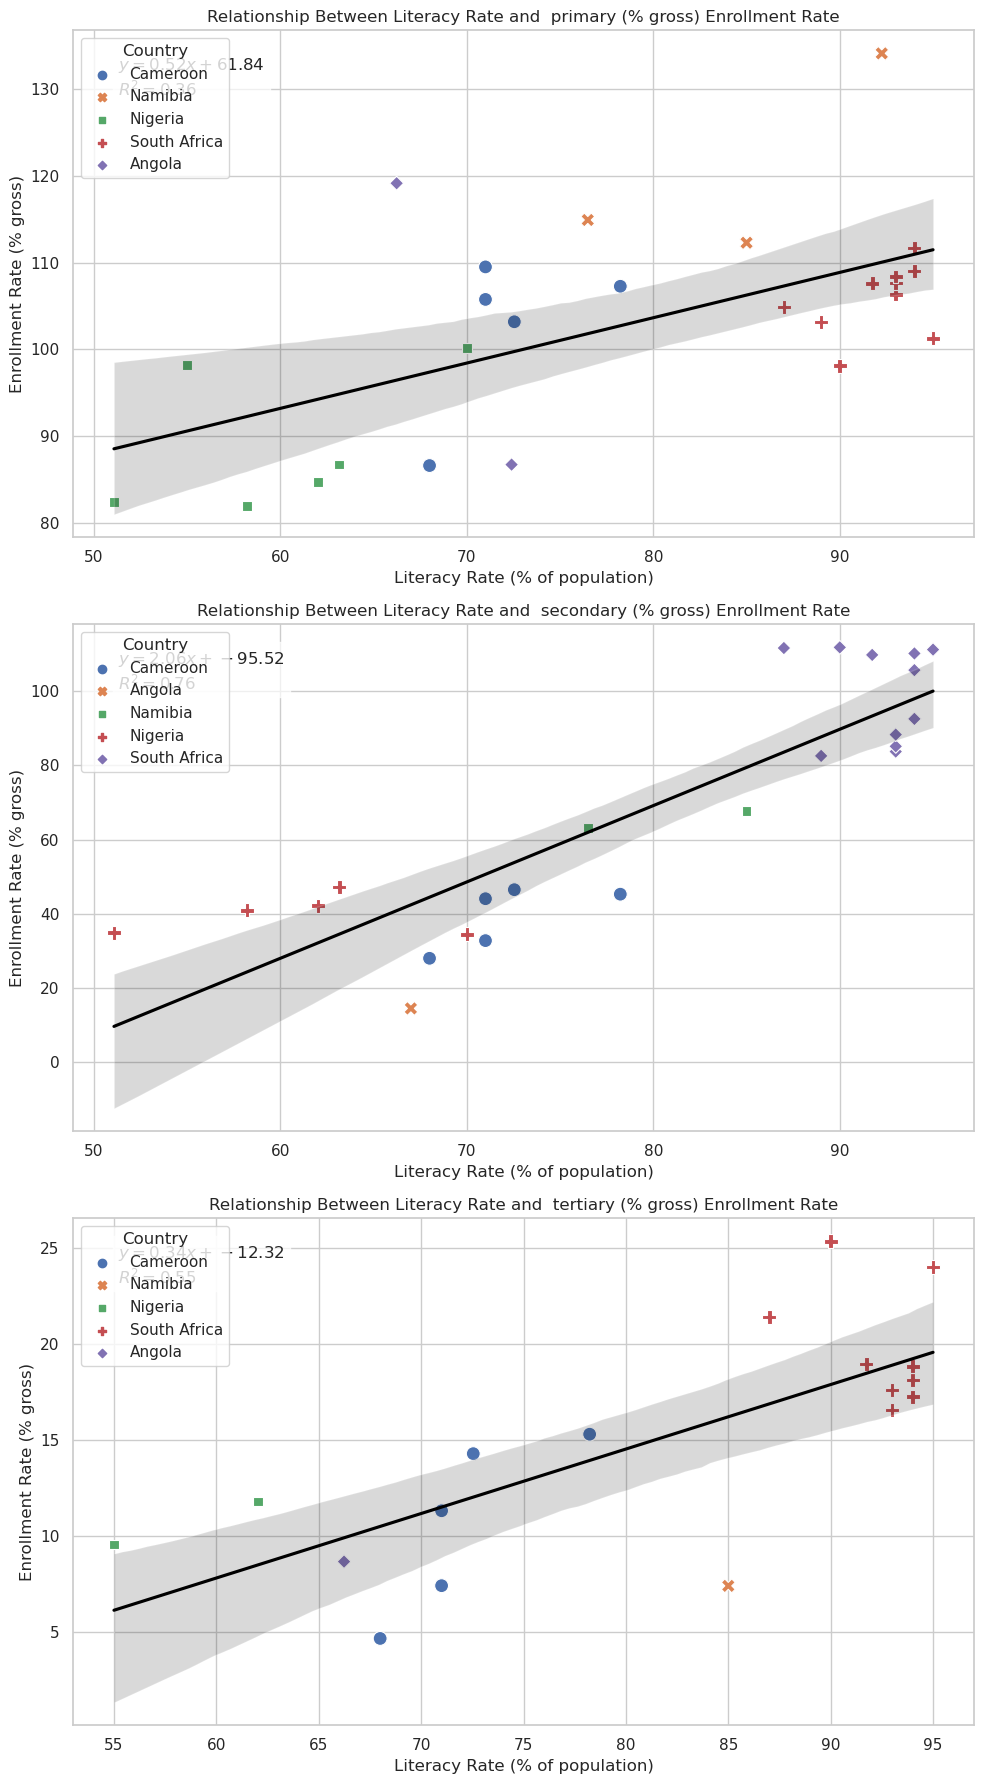

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set up the visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 18))
enrollment_levels = [
    "School enrollment, primary (% gross)",
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)"
]

for ax, level in zip(axes, enrollment_levels):
    # Filter data for the enrollment level
    data = merged_data[merged_data["Series Name"] == level].dropna(subset=["Literacy Rate", "Enrollment Rate"])

    # Scatter plot
    sns.scatterplot(
        data=data,
        x="Literacy Rate",
        y="Enrollment Rate",
        hue="Country Name",
        style="Country Name",
        s=100,
        ax=ax
    )

    # Regression line
    X = sm.add_constant(data["Literacy Rate"])
    y = data["Enrollment Rate"]
    model = sm.OLS(y, X).fit()
    sns.regplot(
        data=data,
        x="Literacy Rate",
        y="Enrollment Rate",
        scatter=False,
        ax=ax,
        color="black"
    )
    
    # Add regression equation and R-squared
    r_squared = model.rsquared
    slope = model.params[1]
    intercept = model.params[0]
    ax.text(
        0.05, 0.95,
        f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$",
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment="top",
        bbox=dict(facecolor="white", alpha=0.7)
    )

    # Customize the plot
    ax.set_title(f"Relationship Between Literacy Rate and {level.split(',')[1]} Enrollment Rate")
    ax.set_xlabel("Literacy Rate (% of population)")
    ax.set_ylabel("Enrollment Rate (% gross)")
    ax.legend(title="Country")

# Adjust layout
plt.tight_layout()
plt.show()


## Observations

### Primary Enrollment Rate
- Countries with higher literacy rates (e.g., South Africa and Namibia) also exhibit higher primary enrollment rates.
- The regression line suggests a positive relationship between literacy rate and primary enrollment rate.

### Secondary Enrollment Rate
- The relationship between literacy rate and secondary enrollment rate is more varied.
- Some countries with lower literacy rates (e.g., Nigeria) still show moderate enrollment rates compared to others.

### Tertiary Enrollment Rate
- A strong positive relationship is observed here.
- Countries with higher literacy rates (e.g., Namibia and South Africa) have significantly higher tertiary enrollment rates.

If further analysis or refinements are needed, additional insights can be drawn from the data!


### Subquestion 2: What is the relationship between unemployment, total (% of total labor force) and school enrollment, tertiary (% gross)?

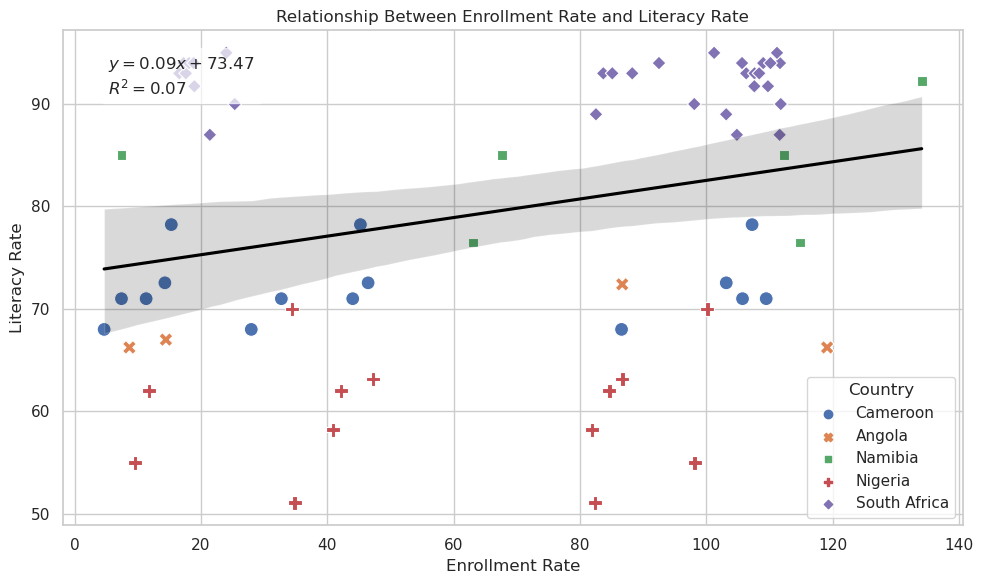

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Clean the data: Drop rows with NaN or inf values for relevant variables
merged_data_cleaned = merged_data.dropna(
    subset=["Enrollment Rate", "Literacy Rate"]
)

# Plotting the relationship
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data_cleaned,
    x="Enrollment Rate",
    y="Literacy Rate",
    hue="Country Name",
    style="Country Name",
    s=100
)
sns.regplot(
    data=merged_data_cleaned,
    x="Enrollment Rate",
    y="Literacy Rate",
    scatter=False,
    color="black"
)

# Add regression equation and R-squared
X = sm.add_constant(merged_data_cleaned["Enrollment Rate"])
y = merged_data_cleaned["Literacy Rate"]
model = sm.OLS(y, X).fit()

r_squared = model.rsquared
slope = model.params[1]
intercept = model.params[0]
plt.text(
    0.05, 0.95,
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Relationship Between Enrollment Rate and Literacy Rate")
plt.xlabel("Enrollment Rate")
plt.ylabel("Literacy Rate")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


  Country Name  Year  Foreign Direct Investment (% of GDP)  Education Metric
0       Angola  2000                              9.623866          12.85634
1       Angola  2001                             24.009076          14.46281
2       Angola  2002                             11.406192           8.18354
3       Angola  2003                             20.081014           2.77182
4       Angola  2004                              9.329239           2.07171


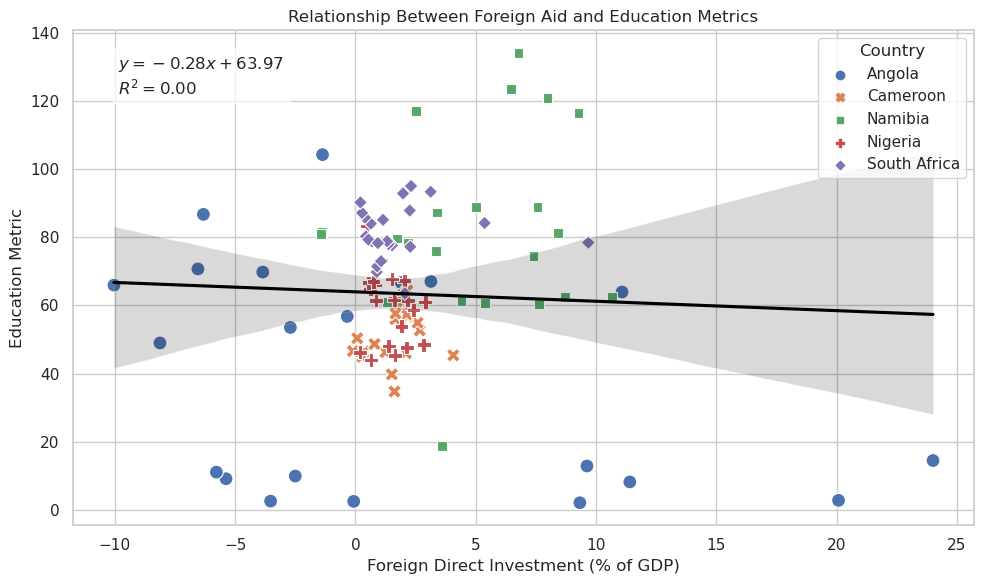

In [27]:
# List of African countries in the dataset
african_countries = [
    "Angola", "Cameroon", "Namibia", "Nigeria", "South Africa"
]

# Filter the dataset for African countries
african_data = aggregated_data[aggregated_data["Country Name"].isin(african_countries)]

# Display the filtered dataset
print(african_data.head())

# Scatter plot with regression line for African countries
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=african_data,
    x="Foreign Direct Investment (% of GDP)",
    y="Education Metric",
    hue="Country Name",
    style="Country Name",
    s=100
)
sns.regplot(
    data=african_data,
    x="Foreign Direct Investment (% of GDP)",
    y="Education Metric",
    scatter=False,
    color="black"
)

# Regression analysis
X = sm.add_constant(african_data["Foreign Direct Investment (% of GDP)"])
y = african_data["Education Metric"]
model = sm.OLS(y, X).fit()

# Extract regression equation and R-squared
r_squared = model.rsquared
slope = model.params[1]
intercept = model.params[0]

# Annotate the regression equation and R-squared
plt.text(
    0.05, 0.95,
    f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.7)
)

# Customize the plot
plt.title("Relationship Between Foreign Aid and Education Metrics")
plt.xlabel("Foreign Direct Investment (% of GDP)")
plt.ylabel("Education Metric")
plt.legend(title="Country")
plt.tight_layout()
plt.show()




# No Strong Correlation

- The regression line has a very slight negative slope (-0.28), suggesting a weak or no consistent relationship between foreign direct investment (FDI) as a percentage of GDP and the education metric in the selected African countries.
- The R-squared value (0.00) indicates that FDI explains virtually none of the variation in education metrics. In short, FDI and education metrics are not strongly linked based on this dataset.

# Country-Level Variability

- Some countries (e.g., South Africa, Namibia) tend to have relatively higher education metrics despite variations in FDI levels.
- Countries like Angola show a wider spread in both FDI and education metrics, indicating significant variability over time.

# Potential Insights

The weak relationship might suggest that FDI, in general, doesn't directly or immediately translate into improvements in educational outcomes. This could be due to:
1. FDI being directed toward sectors that don't directly impact education (e.g., mining, oil).
2. A lag between investment and measurable improvements in education.
3. Systemic challenges within the countries, such as governance or infrastructure, that prevent the effective use of foreign investment in improving education.

# Data and Scope Limitations

- The data might lack granular information (e.g., sector-specific FDI or education-focused aid).
- Other factors, such as government spending on education, quality of governance, or economic stability, might have a stronger influence on education metrics than FDI.
